# **Instalation**

## **Import libaries**

In [1]:
# import pipeline to analyze data
from sklearn.pipeline import Pipeline as pl
# import panda to work with dataset
import pandas as pd
# import matplotlib to make sentigram
import matplotlib.pyplot as plt

## **Import dataset csv**

In [22]:
# read dataset using panda
path = 'komentar.csv'
dataset = pd.read_csv(path,encoding='latin-1')

## **Dataset information**

In [23]:
# show columns information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  600 non-null    object
 1   komentar  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


In [24]:
# show dataset
dataset

,sentimen,komentar
0,negative,<USERNAME> TOLOL!! Gak ada hubungan nya kegug...
1,negative,Geblek lo tata...cowo bgt dibela2in balikan......
2,negative,Kmrn termewek2 skr lengket lg duhhh kok labil ...
3,negative,"Intinya kalau kesel dengan ATT nya, gausah ke ..."
4,negative,"hadewwwww permpuan itu lg!!!!sakit jiwa,knp ha..."
...,...,...
595,negative,"Gak ngerti deh, foto ini bikin gak nyaman."
596,negative,"Pose kamu itu lho, gak ada yang bisa ngertiin."
597,negative,Foto ini gak layak dipajang di timeline siapa-...
598,negative,"Emang sih, setiap orang punya selera, tapi ini..."


## **Dataset Sentigram**

In [25]:
# prepare "shapes" column for pie plot entry
shapes = dataset['sentimen'].value_counts(normalize=True) * 100
Keys = shapes.keys().to_list()
Percent = shapes.to_list()

In [26]:
# Create matplotlib figure
figure = plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 10, 'font.family': 'monospace'})

<Figure size 500x500 with 0 Axes>

([<matplotlib.patches.Wedge at 0x1534e0ad0>,
 [Text(6.735557395310444e-17, 1.1, 'negative'),
  Text(-2.0206672185931328e-16, -1.1, 'positive')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

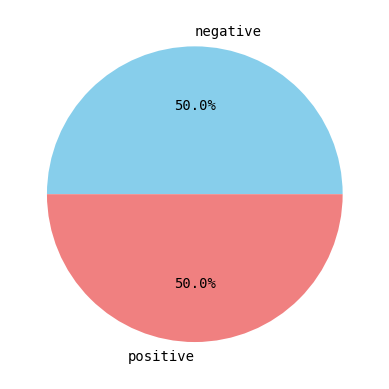

In [27]:
labels = Keys
sizes = Percent
colors = ['Skyblue','lightcoral']
# Plot Pie Chart
plt.pie(sizes,
        colors=colors,
        labels=labels,
        autopct='%1.1f%%',
        shadow=False)

# **Preprocessing Data**

## **1. Folding**

In [28]:
# import regular expression
import re

In [29]:
# make function for folding
def folding(review):
  # remove unuse character => ?, $, ., !, 2_, :, ), (, -, ,
  unuseChars = r'[?$.!2_:")(-+,<>\'\"]'
  review = re.sub(unuseChars,'',str(review))
  # lowercase all review
  review = review.lower()
  # return review folded
  return review

In [30]:
# applied folding to dataset
dataset['komentar'] = dataset['komentar'].apply(folding)

In [31]:
# show dataset
dataset

,sentimen,komentar
0,negative,username tolol gak ada hubungan nya keguguran...
1,negative,geblek lo tatacowo bgt dibelain balikanhadewwn...
2,negative,kmrn termewek skr lengket lg duhhh kok labil b...
3,negative,intinya kalau kesel dengan att nya gausah ke a...
4,negative,hadewwwww permpuan itu lgsakit jiwaknp harus d...
...,...,...
595,negative,gak ngerti deh foto ini bikin gak nyaman
596,negative,pose kamu itu lho gak ada yang bisa ngertiin
597,negative,foto ini gak layak dipajang di timeline siapa-...
598,negative,emang sih setiap orang punya selera tapi ini b...


## **2. Tokenizing**

In [32]:
# import nltk
import nltk
# import word_tokenize from nltk
from nltk.tokenize import word_tokenize

In [33]:
# download tokenizing data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/fikriyuwi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# tokenizing data
dataset['komentar'] = [word_tokenize(sentence) for sentence in dataset['komentar']]

In [35]:
# show dataset
dataset

,sentimen,komentar
0,negative,"[username, tolol, gak, ada, hubungan, nya, keg..."
1,negative,"[geblek, lo, tatacowo, bgt, dibelain, balikanh..."
2,negative,"[kmrn, termewek, skr, lengket, lg, duhhh, kok,..."
3,negative,"[intinya, kalau, kesel, dengan, att, nya, gaus..."
4,negative,"[hadewwwww, permpuan, itu, lgsakit, jiwaknp, h..."
...,...,...
595,negative,"[gak, ngerti, deh, foto, ini, bikin, gak, nyaman]"
596,negative,"[pose, kamu, itu, lho, gak, ada, yang, bisa, n..."
597,negative,"[foto, ini, gak, layak, dipajang, di, timeline..."
598,negative,"[emang, sih, setiap, orang, punya, selera, tap..."


## **3. Remove meaningless word**

In [36]:
# import stopword
from nltk.corpus import stopwords

In [37]:
# download stopword data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fikriyuwi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
# set stopword language
stop_words = stopwords.words('indonesian')

In [43]:
stop_words

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [39]:
# function to remove / filter sentences stopword
def remove_stopwords(sentence):
    filtered_words = [word for word in sentence if word.lower() not in stop_words]
    return filtered_words

In [41]:
# apply remove_stopwords function
dataset['komentar'] = dataset['komentar'].apply(remove_stopwords)

In [42]:
# dataset column review after filtered
dataset

,sentimen,komentar
0,negative,"[username, tolol, gak, hubungan, nya, kegugura..."
1,negative,"[geblek, lo, tatacowo, bgt, dibelain, balikanh..."
2,negative,"[kmrn, termewek, skr, lengket, lg, duhhh, labi..."
3,negative,"[intinya, kesel, att, nya, gausah, anaknya, ka..."
4,negative,"[hadewwwww, permpuan, lgsakit, jiwaknp, yg, jd..."
...,...,...
595,negative,"[gak, ngerti, deh, foto, bikin, gak, nyaman]"
596,negative,"[pose, lho, gak, ngertiin]"
597,negative,"[foto, gak, layak, dipajang, timeline, siapa-s..."
598,negative,"[emang, sih, orang, selera, beneran, nggak, ba..."


## **4. Stemming**

In [44]:
# import stemmer factory from sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [45]:
# make stemming function
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(content):
  words = []
  result = []

  for word in content:
      stem_result = stemmer.stem(word)
      words.append(stem_result)

  result = " ".join(words)
  return result

In [47]:
# apply stemming to dataset
dataset['komentar'] = dataset['komentar'].apply(stemming)

In [48]:
# show dataset
dataset

,sentimen,komentar
0,negative,username tolol gak hubung nya gugur dgn pake h...
1,negative,geblek lo tatacowo bgt bain balikanhadewwntar ...
2,negative,kmrn mewek skr lengket lg duhhh labil bgt sih ...
3,negative,inti kesel att nya gausah anak kasi kembang ps...
4,negative,hadewwwww permpuan lgsakit jiwaknp yg jd peran...
...,...,...
595,negative,gak ngerti deh foto bikin gak nyaman
596,negative,pose lho gak ngertiin
597,negative,foto gak layak pajang timeline siapa
598,negative,emang sih orang selera beneran nggak bagus


## **5. Memastikan tidak ada tuples kosong**

In [49]:
# import numpy
import numpy as np

In [50]:
# replace blank data with NaN using numpy
dataset['komentar'].replace('', np.nan, inplace=True)

In [52]:
# show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  600 non-null    object
 1   komentar  600 non-null    object
dtypes: object(2)
memory usage: 9.5+ KB


## **6. Save clean data**

In [53]:
# make new csv and save the clean data into it
dataset.to_csv('komentar_clean.csv',index=False)

# **Apply machine learning**

## **1. Import clean data**

In [54]:
# read clean dataset
clean_path = 'komentar_clean.csv'
clean_dataset = pd.read_csv(clean_path,encoding='latin-1')

In [55]:
clean_dataset

,sentimen,komentar
0,negative,username tolol gak hubung nya gugur dgn pake h...
1,negative,geblek lo tatacowo bgt bain balikanhadewwntar ...
2,negative,kmrn mewek skr lengket lg duhhh labil bgt sih ...
3,negative,inti kesel att nya gausah anak kasi kembang ps...
4,negative,hadewwwww permpuan lgsakit jiwaknp yg jd peran...
...,...,...
595,negative,gak ngerti deh foto bikin gak nyaman
596,negative,pose lho gak ngertiin
597,negative,foto gak layak pajang timeline siapa
598,negative,emang sih orang selera beneran nggak bagus


In [56]:
# cast type of review and label to string
clean_dataset = clean_dataset.astype({'sentimen': 'string','komentar':'string'})

In [57]:
# show clean dataset info
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  600 non-null    string
 1   komentar  600 non-null    string
dtypes: string(2)
memory usage: 9.5 KB


## **2. Work with TF-IDF**

In [58]:
# import
# countvectorizr to convert collection of text documents to a matrix of token counts
# tfidftranformer to transform this count matrix to a normalized TD-IDF

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

In [59]:
# create an instance of CountVectorizer
count_vectorizer = CountVectorizer()

In [60]:
# create instance from TfidfTransformer
tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)

In [61]:
# create instance from TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

In [62]:
# transform the text data
x_count = count_vectorizer.fit_transform(clean_dataset['komentar'])

In [63]:
# show td-idf score
x_count.shape

(600, 2697)

In [64]:
# show tf-idf matrix
print(x_count.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
tfidf_transformer.fit(x_count)

TfidfTransformer()

In [66]:
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=count_vectorizer.get_feature_names_out(),columns=["idf_weights"])

In [67]:
# inverse document frequency
df_idf.sort_values(by=['idf_weights'])

,idf_weights
yg,2.493320
gak,2.586411
foto,2.944248
username,2.979754
ya,3.004146
...,...
iyaaa,6.705448
ituu,6.705448
itungannya,6.705448
jam,6.705448


## **3. Split data training & test**

In [68]:
# import to split train and test data
from sklearn.model_selection import train_test_split

In [69]:
# assign x and y
x = clean_dataset.komentar
y = clean_dataset.sentimen

In [70]:
# split train & test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

In [71]:
# applying tfidf to data training
x_train_tf = tfidf_vectorizer.fit_transform(x_train)

In [72]:
# print shape of training data
print("n_samples: %d, n_features: %d" % x_train_tf.shape)

n_samples: 450, n_features: 2172


In [73]:
# applying tfidf to data testing
x_test_tf = tfidf_vectorizer.transform(x_test)

In [74]:
# print shape of testing data
print("n_samples: %d, n_features: %d" % x_test_tf.shape)

n_samples: 150, n_features: 2172


## **4. Working with naive bayes**

In [75]:
# import pipeline and naive bayes
from sklearn.naive_bayes import MultinomialNB

In [76]:
# make instance of naive bayes
naive_bayes = MultinomialNB()

In [77]:
naive_bayes.fit(x_train_tf,y_train)

MultinomialNB()

In [78]:
x_test_tf = tfidf_vectorizer.transform(x_test)

In [79]:
# make predict
y_pred = naive_bayes.predict(x_test_tf)

In [80]:
# import metrics
from sklearn import metrics

In [81]:
print(metrics.classification_report(y_test, y_pred, target_names=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.82      0.86      0.84        71
    negative       0.87      0.84      0.85        79

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150



In [82]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[61 10]
 [13 66]]


## **5. Sentiment result**

In [83]:
# make predict with new data
def predict_data(data):
  # folding
  data = folding(data)
  # tokenizing
  data = word_tokenize(data)
  # steamming
  data = stemming(data)
  # vectorized
  data_input = []
  data_input.append(data)
  data_input_ready = tfidf_vectorizer.transform(data_input)
  # predict to model
  result = naive_bayes.predict(data_input_ready)
  return result

In [88]:
test = "bukan gimana tapi mending hapus aja"

In [89]:
# result of prediction
predict_data(test)

array(['negative'], dtype='<U8')